# Exploratory Data Analysis (EDA)

### Collect and Import Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("employee_data.csv")

### Inspect Structure

In [2]:
df.shape  # how many rows and columns
df.info() # data types, non-null counts
df.describe() # quick stats for numeric columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 1000 non-null   int64  
 1   Age                950 non-null    float64
 2   Gender             970 non-null    object 
 3   Education          960 non-null    object 
 4   Salary             1000 non-null   float64
 5   Experience         950 non-null    float64
 6   Department         1000 non-null   object 
 7   Remote_Work        1000 non-null   object 
 8   Joining_Year       970 non-null    float64
 9   Performance_Score  1000 non-null   float64
 10  Certifications     900 non-null    float64
 11  Attrition          1000 non-null   object 
dtypes: float64(6), int64(1), object(5)
memory usage: 93.9+ KB


,ID,Age,Salary,Experience,Joining_Year,Performance_Score,Certifications
count,1000.000000,950.000000,1000.000000,950.000000,970.000000,1000.000000,900.000000
mean,500.500000,43.844211,70468.891090,24.958947,2007.092784,5.447000,4.857778
std,288.819436,14.934453,24747.292357,14.143901,10.234689,2.880189,3.149553
min,1.000000,18.000000,3210.000000,0.000000,1990.000000,1.000000,0.000000
25%,250.750000,31.000000,54699.425000,13.000000,1998.000000,3.000000,2.000000
50%,500.500000,44.000000,69506.200000,25.000000,2007.000000,5.000000,5.000000
75%,750.250000,56.000000,84238.840000,37.000000,2016.000000,8.000000,8.000000
max,1000.000000,69.000000,310829.740000,49.000000,2025.000000,10.000000,10.000000


In [3]:
df.head() # first 5 rows

,ID,Age,Gender,Education,Salary,Experience,Department,Remote_Work,Joining_Year,Performance_Score,Certifications,Attrition
0,1,56.0,Male,High School,87046.90,5.0,HR,No,2006.0,1.0,6.0,Yes
1,2,69.0,Other,Masters,69873.07,NaN,IT,Yes,2009.0,5.0,3.0,No
2,3,46.0,Female,High School,60916.63,38.0,Operations,No,1992.0,9.0,NaN,No
3,4,32.0,Male,PhD,76792.04,11.0,IT,Yes,2015.0,6.0,NaN,No
4,5,60.0,Male,PhD,35025.08,NaN,Marketing,No,2004.0,10.0,NaN,No


## Data Cleaning

In [4]:
df.isnull().sum()

ID                     0
Age                   50
Gender                30
Education             40
Salary                 0
Experience            50
Department             0
Remote_Work            0
Joining_Year          30
Performance_Score      0
Certifications       100
Attrition              0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
# Fill empty employees age with non-empty median ages
df['Age'] = df['Age'].fillna(
    df.groupby('Education')['Age'].transform('median')
)

In [7]:
df = df.dropna(subset=['Age' , 'Education' , 'Gender' , 'Experience'])

In [8]:
df['Joining_Year'] = df['Joining_Year'].fillna(
    df.groupby('Education')['Joining_Year'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
)

In [9]:
df['Certifications'] = df['Certifications'].fillna(
    df.groupby(['Education'])['Certifications'].transform('median')
)


In [10]:
df.isnull().sum()

ID                   0
Age                  0
Gender               0
Education            0
Salary               0
Experience           0
Department           0
Remote_Work          0
Joining_Year         0
Performance_Score    0
Certifications       0
Attrition            0
dtype: int64

In [11]:
df.shape

(882, 12)

<Axes: ylabel='Gender'>

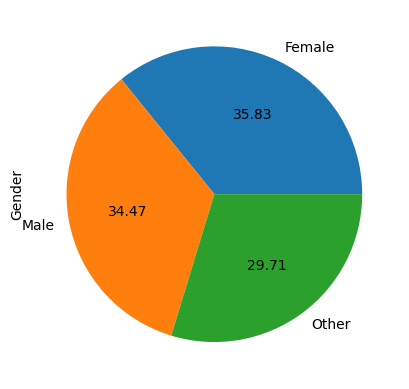

In [12]:
 # pie chart

df['Gender'].value_counts().plot(kind='pie',autopct='%0.2f',ylabel='Gender')

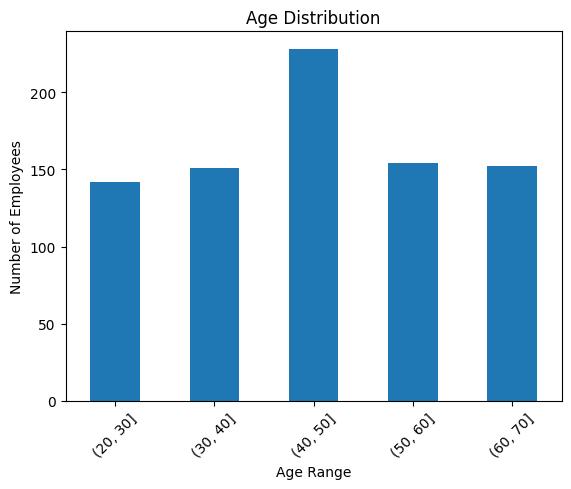

In [13]:
df['Age_Group'] = pd.cut(df['Age'], bins=range(20, 71, 10))
age_counts = df['Age_Group'].value_counts().sort_index()
age_counts.plot(kind='bar')

plt.xlabel("Age Range")
plt.ylabel("Number of Employees")
plt.title('Age Distribution')
plt.xticks(rotation=45)
plt.show()

<Axes: ylabel='Salary'>

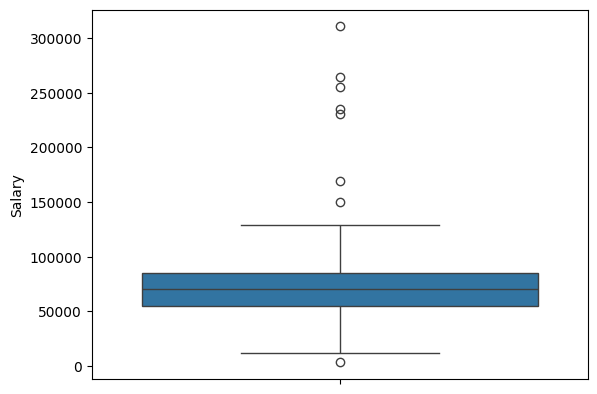

In [14]:
sns.boxplot(df['Salary'])

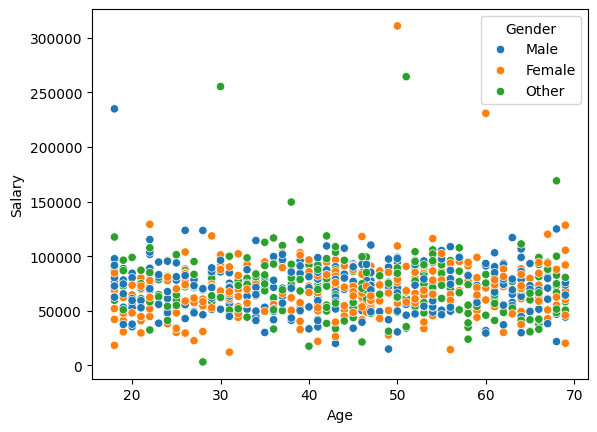

In [15]:
sns.scatterplot(x='Age', y='Salary',hue='Gender' ,data=df)
plt.show()

(array([84., 95., 99., 99., 89., 76., 94., 75., 78., 93.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

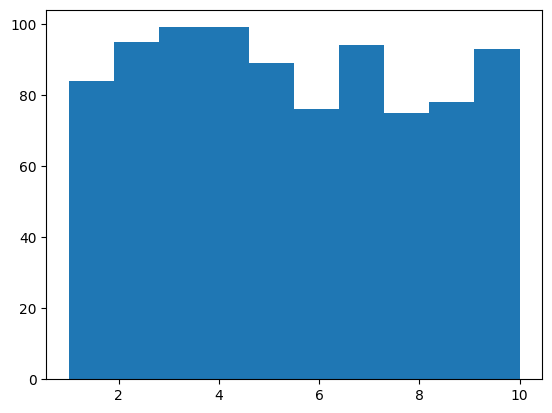

In [16]:
plt.hist(df['Performance_Score'])

<Axes: >

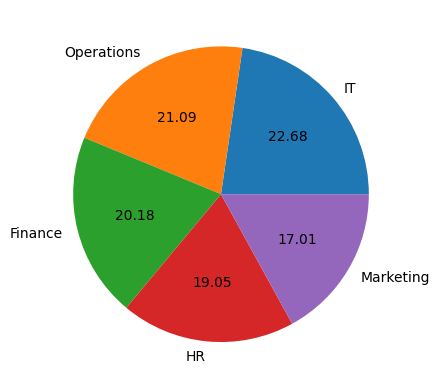

In [17]:
df['Department'].value_counts().plot(kind='pie',autopct='%0.2f',ylabel='')

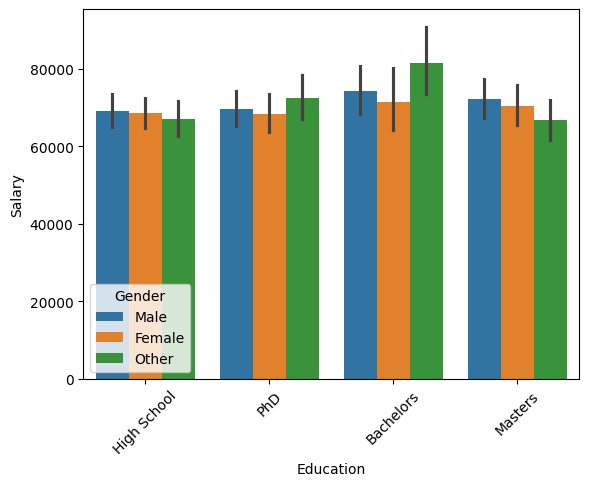

In [18]:
sns.barplot(x='Education', y='Salary', hue='Gender', data=df)

plt.xticks(rotation=45)
plt.show()

In [19]:
df.to_csv('updated-data.csv')

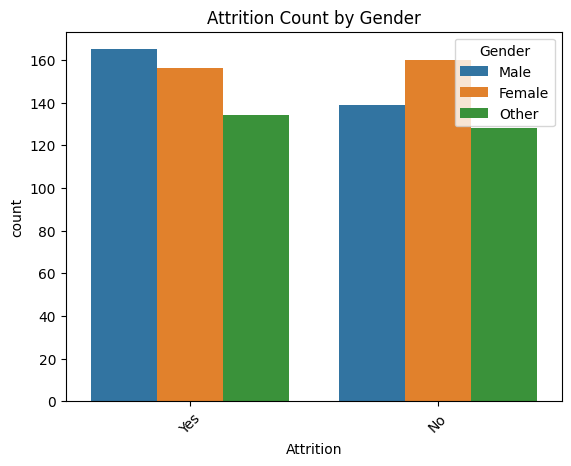

In [20]:
sns.countplot(x='Attrition', hue='Gender', data=df)

plt.xticks(rotation=45)
plt.title("Attrition Count by Gender")
plt.show()

<Axes: >

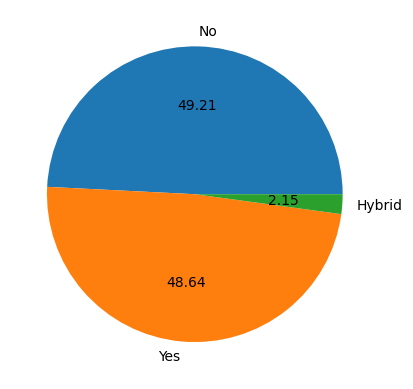

In [21]:
df['Remote_Work'] = df['Remote_Work'].replace('Non', 'Hybrid')
df['Remote_Work'].value_counts().plot(kind='pie',autopct='%0.2f',ylabel='')

<Axes: xlabel='Gender', ylabel='Experience'>

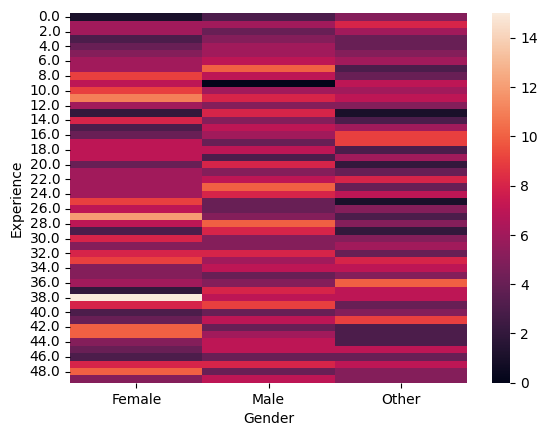

In [22]:
sns.heatmap(pd.crosstab(df['Experience'],df['Gender']))

(array([ 75.,  63.,  82.,  84., 116., 116.,  66.,  77.,  66., 137.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

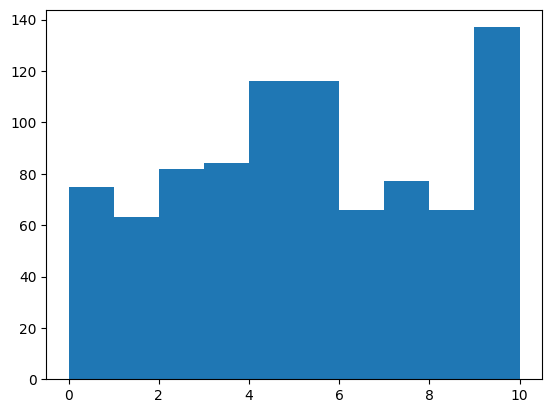

In [23]:
plt.hist(df['Certifications'])

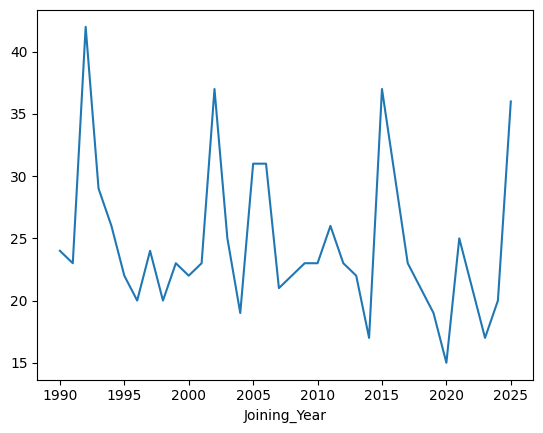

In [24]:
# Count number of entries per Joining_Year
year_counts = df['Joining_Year'].value_counts().sort_index()

sns.lineplot(x=year_counts.index, y=year_counts.values)
plt.show()

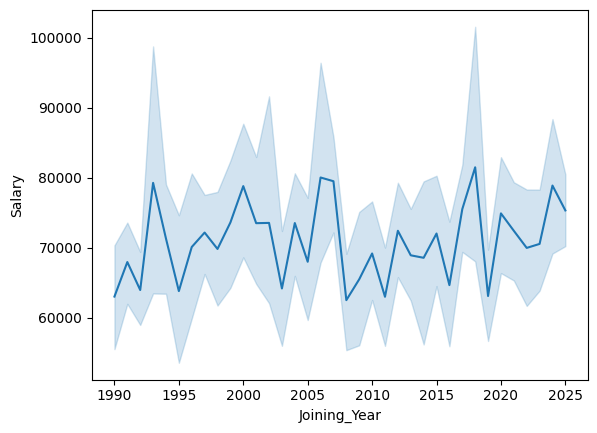

In [25]:
sns.lineplot(x='Joining_Year', y='Salary', data=df)
plt.show()

In [26]:
df = pd.read_csv('updated-data.csv')
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1, 'Other': 2})
df['Remote_Work'] = df['Remote_Work'].map({'Yes': 1, 'No': 0, 'Hybrid': 2})
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df['Education'] = df['Education'].map({'High School': 1, 'Bachelors': 2, 'Masters': 3, 'PhD' : 4})
df['Department'] = df['Department'].map({'Finance': 1, 'HR': 2, 'IT': 3, 'Marketing' : 4, 'Operations' : 5})

## Feature Engineering

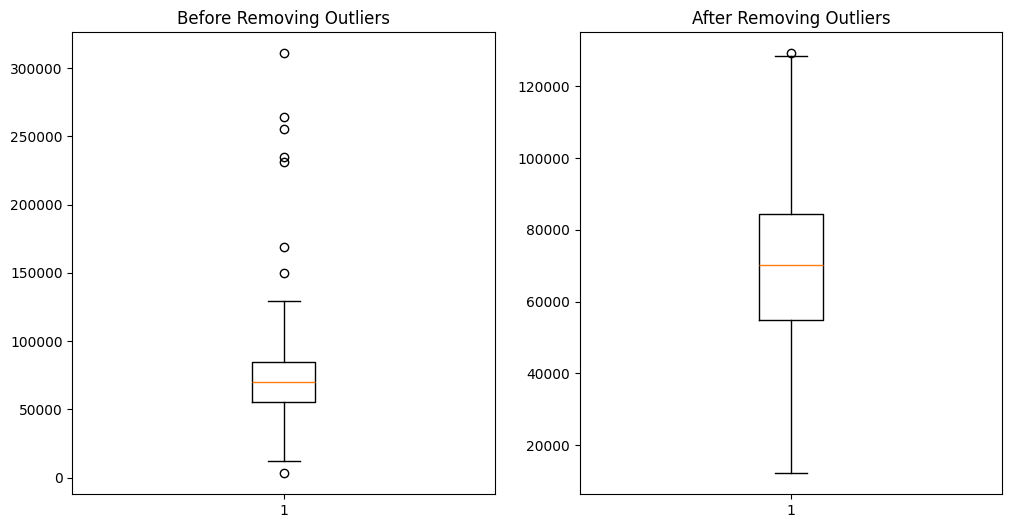

In [27]:
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_filtered = df[(df['Salary'] >= lower_bound) & (df['Salary'] <= upper_bound)]

# Plot before and after removing outliers
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.boxplot(df['Salary'])
ax1.set_title("Before Removing Outliers")

ax2.boxplot(df_filtered['Salary'])
ax2.set_title("After Removing Outliers")

plt.show()

In [28]:
from sklearn.preprocessing import MinMaxScaler
df = df_filtered
# For Age
df['Age'] = MinMaxScaler().fit_transform(df[['Age']])

# For Salary
df['Salary'] = MinMaxScaler().fit_transform(df[['Salary']])

In [29]:
df.to_csv('updated-data2.csv')

In [30]:
df.rename(columns={'Unnamed: 0': 'Index'}, inplace=True)

In [31]:
df.to_csv('updated-data2.csv')

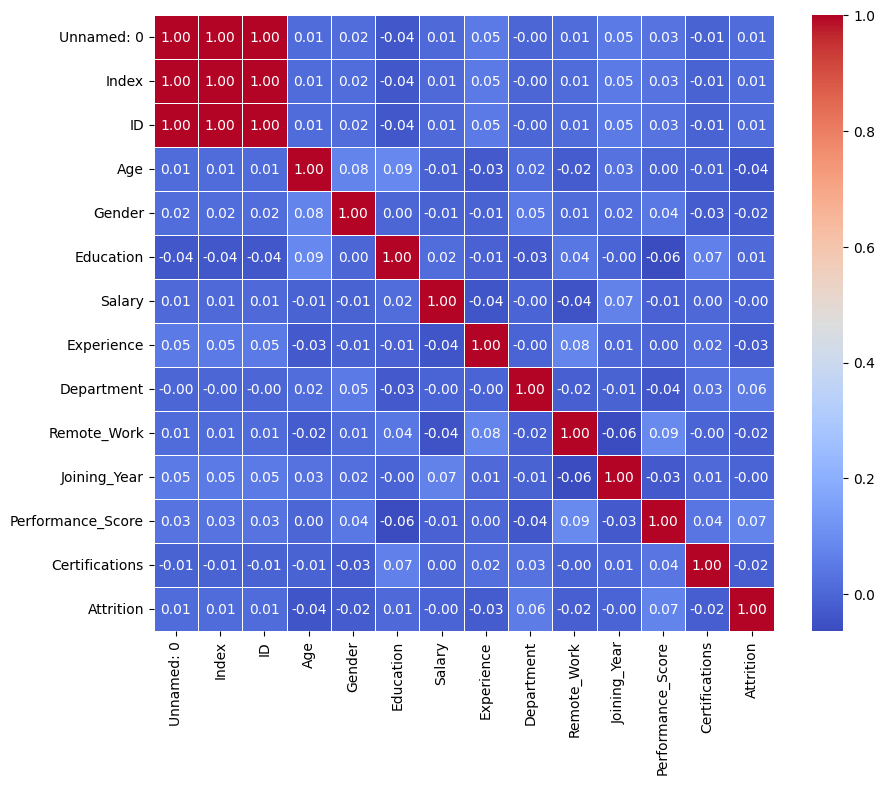

Columns to drop due to high correlation: ['Index', 'ID']


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('updated-data2.csv')
df_numeric = df.select_dtypes(include=np.number)
# Calculate correlation matrix
corr_matrix = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.show()

# Drop highly correlated features (correlation > 0.9)
corr_threshold = 0.9

# Select upper triangle of correlation matrix to avoid self-correlation
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find columns to drop
to_drop = [column for column in upper.columns if any(abs(upper[column]) > corr_threshold)]

print("Columns to drop due to high correlation:", to_drop)

# Optionally, drop them from the dataframe
df_reduced = df.drop(columns=to_drop)



In [33]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('updated-data2.csv')

# Select only numeric features
df_numeric = df.select_dtypes(include=np.number)

# Separate features and target if needed
# For example, target column is 'Salary'
X = df_numeric.drop(columns=['Salary'], errors='ignore')  # features
y = df_numeric['Salary'] if 'Salary' in df_numeric.columns else None

# Handle missing values by imputing mean
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)


In [34]:
# Fit PCA without specifying n_components to see all components
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio for each component:")
print(explained_variance)


Explained variance ratio for each component:
[2.31749684e-01 8.99166796e-02 8.63943390e-02 8.44778919e-02
 8.12385319e-02 7.89448911e-02 7.71813747e-02 7.45183090e-02
 6.89323022e-02 6.72448498e-02 5.93977677e-02 3.37853775e-06
 1.61885627e-18]


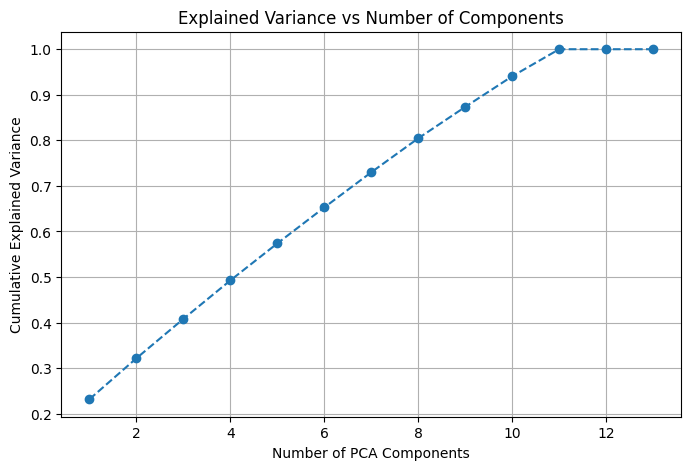

Number of components to explain 95% variance: 11


In [35]:
# Cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of PCA Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs Number of Components')
plt.grid(True)
plt.show()

# Choose number of components to explain 95% variance
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components to explain 95% variance: {n_components_95}")


In [36]:
# Apply PCA with optimal number of components
pca_final = PCA(n_components=n_components_95)
X_pca_final = pca_final.fit_transform(X_scaled)

print(f"Shape of original features: {X_scaled.shape}")
print(f"Shape after PCA: {X_pca_final.shape}")


Shape of original features: (874, 13)
Shape after PCA: (874, 11)


## Linear Regression

Learned parameters (theta): [ 0.21182158  0.21182158  0.00023445  0.00021438  0.00021438 -0.00044066
  0.00452032  0.00218676 -0.00724237 -0.00397624 -0.00220533  0.0054392
 -0.00545992  0.00094589 -0.00409896]
MSE train: 0.0341
MSE test: 0.0342


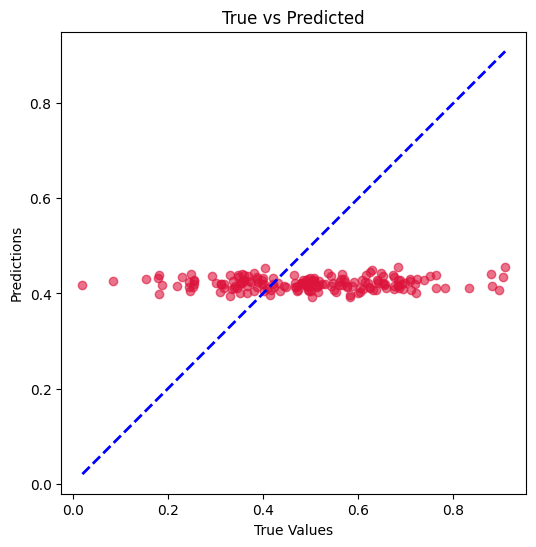

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Load and preprocess dataset

df = pd.read_csv('updated-data2.csv') 

# Select numeric features
df_numeric = df.select_dtypes(include=np.number)

# Separate features and target (replace 'Salary' with your target column)
target_column = 'Salary' if 'Salary' in df_numeric.columns else df_numeric.columns[-1]
X = df_numeric.drop(columns=[target_column])
y = df_numeric[target_column]

# Add intercept column
X_scaled = np.hstack([np.ones((X_scaled.shape[0], 1)), X_scaled])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y.values, test_size=0.2, random_state=42)


# Gradient Descent for Linear Regression

def gradient_descent(X, y, lr=0.001, max_iter=1000):
    theta = np.zeros(X.shape[1])
    m = X.shape[0]

    for i in range(max_iter):
        y_hat = X @ theta
        grad = (X.T @ (y_hat - y)) / m
        theta -= lr * grad

    return theta

# Train model
theta = gradient_descent(X_train, y_train, lr=0.001, max_iter=1000)
print("Learned parameters (theta):", theta)

# Predictions and Evaluation

def mse(y_pred, y_true):
    return ((y_pred - y_true)**2).mean()

# Training MSE
y_train_pred = X_train @ theta
mse_train = mse(y_train_pred, y_train)
print(f"MSE train: {mse_train:.4f}")

# Testing MSE
y_test_pred = X_test @ theta
mse_test = mse(y_test_pred, y_test)
print(f"MSE test: {mse_test:.4f}")

# Visualize Predictions
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_test_pred, c='crimson', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'b--', linewidth=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted')
plt.axis('equal')
plt.show()


In [39]:
#inference 

X_train[0]
X_test[0]
print('Sample value test -->',X_test[0] @ theta)

print('predicted value -->',y_test[0])

Sample value test --> 0.41166439056973125
predicted value --> 0.7645456945758847


## Logistic Regression

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("updated-data.csv")


In [41]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


In [42]:
from sklearn.preprocessing import StandardScaler

# Reshape for scaler
salary = df['Salary'].values.reshape(-1, 1)

# Standardize Salary
scaler = StandardScaler()
salary_scaled = scaler.fit_transform(salary)

# Apply sigmoid
salary_sigmoid = sigmoid(salary_scaled)

# Add to dataframe
df['Salary_sigmoid'] = salary_sigmoid

print(df[['Salary', 'Salary_sigmoid']].head())


     Salary  Salary_sigmoid
0  87046.90        0.654854
1  60916.63        0.401490
2  76792.04        0.557843
3  83082.11        0.618382
4  87339.80        0.657483


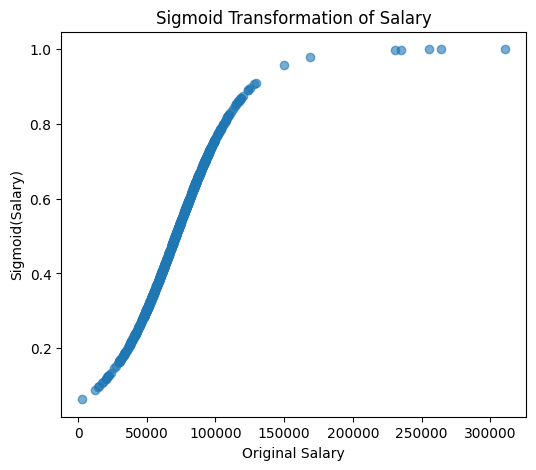

In [43]:
plt.figure(figsize=(6,5))
plt.scatter(df['Salary'], df['Salary_sigmoid'], alpha=0.6)
plt.xlabel("Original Salary")
plt.ylabel("Sigmoid(Salary)")
plt.title("Sigmoid Transformation of Salary")
plt.show()

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("updated-data.csv")

# Define sigmoid + derivative
def sigmoid(x, deriv=False):
    sig = 1 / (1 + np.exp(-x))
    if deriv:
        return sig * (1 - sig)
    return sig

# Scale Salary (IMPORTANT)
salary = df["Salary"].values.reshape(-1, 1)

scaler = StandardScaler()
salary_scaled = scaler.fit_transform(salary).flatten()

# Apply sigmoid + derivative
salary_sigmoid = sigmoid(salary_scaled)
salary_deriv = sigmoid(salary_scaled, deriv=True)

# Store in dataframe
df["Salary_sigmoid"] = salary_sigmoid
df["Salary_sigmoid_derivative"] = salary_deriv

print(df[["Salary", "Salary_sigmoid", "Salary_sigmoid_derivative"]].head())


     Salary  Salary_sigmoid  Salary_sigmoid_derivative
0  87046.90        0.654854                   0.226020
1  60916.63        0.401490                   0.240296
2  76792.04        0.557843                   0.246654
3  83082.11        0.618382                   0.235986
4  87339.80        0.657483                   0.225199


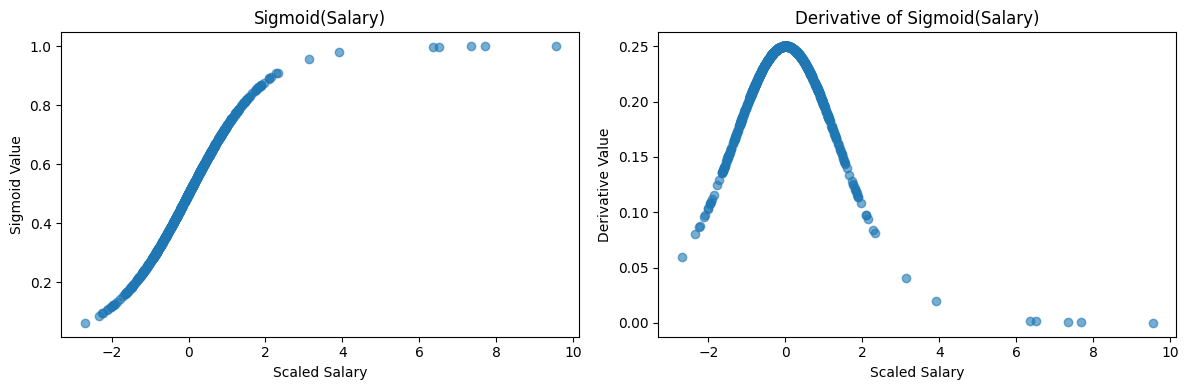

In [45]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Sigmoid plot
ax[0].scatter(salary_scaled, salary_sigmoid, alpha=0.6)
ax[0].set_title("Sigmoid(Salary)")
ax[0].set_xlabel("Scaled Salary")
ax[0].set_ylabel("Sigmoid Value")

# Derivative plot
ax[1].scatter(salary_scaled, salary_deriv, alpha=0.6)
ax[1].set_title("Derivative of Sigmoid(Salary)")
ax[1].set_xlabel("Scaled Salary")
ax[1].set_ylabel("Derivative Value")

plt.tight_layout()
plt.show()

## Log Loss

In [46]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv("updated-data.csv")


In [47]:
median_salary = df["Salary"].median()
df["Salary_binary"] = (df["Salary"] > median_salary).astype(int)

y = df["Salary_binary"].values


In [48]:
# Select numeric features (excluding target)
X = df.select_dtypes(include=np.number).drop(columns=["Salary", "Salary_binary"])

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Add intercept term
X_scaled = np.hstack([np.ones((X_scaled.shape[0], 1)), X_scaled])


In [49]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def cross_entropy_loss(y, h):
    epsilon = 1e-10  # avoid log(0)
    h = np.clip(h, epsilon, 1 - epsilon)
    return -np.sum(y * np.log(h) + (1 - y) * np.log(1 - h)) / len(y)


In [50]:
# Random weights (for demonstration)
np.random.seed(42)
theta = np.random.randn(X_scaled.shape[1])

# Linear combination
z = X_scaled @ theta

# Predicted probabilities
h = sigmoid(z)

# Compute cross-entropy loss
loss = cross_entropy_loss(y, h)

print("Cross-Entropy Loss on your dataset:", loss)


Cross-Entropy Loss on your dataset: 1.238332627579729


## Retrain

### Load and Prepare Data

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("updated-data.csv")

# Convert Salary to binary (above median = 1, below = 0)
median_salary = df["Salary"].median()
df["Salary_binary"] = (df["Salary"] > median_salary).astype(int)

# Features
X = df.select_dtypes(include=np.number).drop(columns=["Salary", "Salary_binary"])
y = df["Salary_binary"].values

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Add intercept
X_scaled = np.hstack([np.ones((X_scaled.shape[0], 1)), X_scaled])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


### Define Sigmoid + Cross-Entropy

In [52]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_loss(y, h):
    epsilon = 1e-10
    h = np.clip(h, epsilon, 1 - epsilon)
    return -np.mean(y * np.log(h) + (1 - y) * np.log(1 - h))


### Gradient Descent Training

In [53]:
def train_logistic_regression(X, y, lr=0.01, iterations=1000):
    m, n = X.shape
    theta = np.zeros(n)
    losses = []

    for i in range(iterations):
        z = X @ theta
        h = sigmoid(z)

        gradient = (X.T @ (h - y)) / m
        theta -= lr * gradient

        loss = compute_loss(y, h)
        losses.append(loss)

        if i % 100 == 0:
            print(f"Iteration {i} | Loss: {loss:.4f}")

    return theta, losses


### Train the Model

In [54]:
theta, losses = train_logistic_regression(
    X_train, y_train,
    lr=0.05,          # learning rate
    iterations=2000   # more iterations = better convergence
)


Iteration 0 | Loss: 0.6931
Iteration 100 | Loss: 0.6900
Iteration 200 | Loss: 0.6898
Iteration 300 | Loss: 0.6897
Iteration 400 | Loss: 0.6897
Iteration 500 | Loss: 0.6897
Iteration 600 | Loss: 0.6897
Iteration 700 | Loss: 0.6897
Iteration 800 | Loss: 0.6897
Iteration 900 | Loss: 0.6897
Iteration 1000 | Loss: 0.6897
Iteration 1100 | Loss: 0.6897
Iteration 1200 | Loss: 0.6897
Iteration 1300 | Loss: 0.6897
Iteration 1400 | Loss: 0.6897
Iteration 1500 | Loss: 0.6897
Iteration 1600 | Loss: 0.6897
Iteration 1700 | Loss: 0.6897
Iteration 1800 | Loss: 0.6897
Iteration 1900 | Loss: 0.6897


### Plot Loss Curve

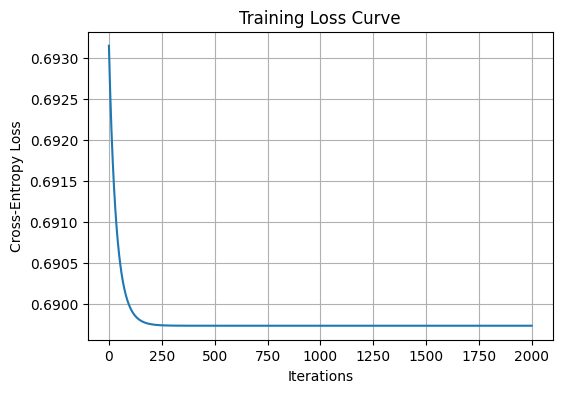

In [55]:
plt.figure(figsize=(6,4))
plt.plot(range(len(losses)), losses)
plt.title("Training Loss Curve")
plt.xlabel("Iterations")
plt.ylabel("Cross-Entropy Loss")
plt.grid(True)
plt.show()



### Evaluate on Test Set

In [56]:
z_test = X_test @ theta
h_test = sigmoid(z_test)

test_loss = compute_loss(y_test, h_test)

print("Final Training Loss:", losses[-1])
print("Test Loss:", test_loss)

# Accuracy
predictions = (h_test >= 0.5).astype(int)
accuracy = np.mean(predictions == y_test)
print("Test Accuracy:", accuracy)


Final Training Loss: 0.6897393722562227
Test Loss: 0.6952740432689305
Test Accuracy: 0.4971751412429379
